# Nivel 1
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [1]:
import mysql.connector
operaciones = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234",
  database="operaciones"
)
print(operaciones)
mycursor = operaciones.cursor()
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)


('companies',)
('credit_card',)
('estado_tarjeta',)
('products',)
('tiquets',)
('tiquets_juntos',)
('transactions',)
('users',)


## Ejercicio 1: Una variable numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3662788948.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(products, operaciones)


<Figure size 600x400 with 0 Axes>

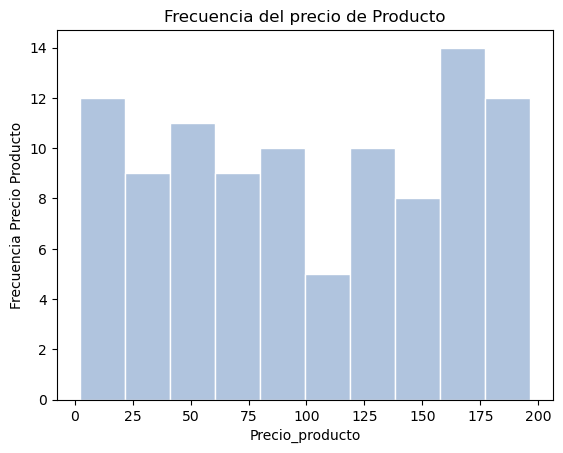

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;

# Selección de datos
products = 'SELECT * FROM products'
df_products = pd.read_sql(products, operaciones)

# Crear el gráfico de barras
plt.figure(figsize = (6,4))
fig, ax = plt.subplots()
ax.hist(df_products['price'], color = "lightsteelblue", edgecolor = "white")
plt.xlabel('Precio_producto')
plt.ylabel('Frecuencia Precio Producto')
plt.title('Frecuencia del precio de Producto')
plt.savefig('Nivel1_ejercicio1prova.jpeg')
plt.show()



### Discursión.

##### El gráfico utilizado para representar una variable numérica es el Histograma. En este gráfico representamos la variable precio del producto.
##### Según el resultado del gráfico, no parece que haya un patrón de venta según el precio del producto. Tanto se venden productos baratos, como productos más caros. De hecho, el rango con más presencia es un rango de valor de los más altos.

## Ejercicio 2: Dos variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3097371291.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)


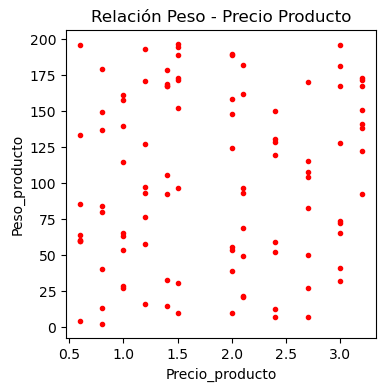

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(4, 4))
plt.plot( 'weight', 'price', data=df_productos, linestyle='none', marker='.', color = 'red')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.title('Relación Peso - Precio Producto')
plt.savefig('Nivel1_ejercicio2prova.jpeg')
plt.show()



### Discursión.

##### El gráfico utilizado para representar dos variables numéricas hemos utilizado un Scatter Plot ó gráfico de dispersión, corresponde auna representación gráfica de la relación entre dos variables cuantitativas, que suelen representarse como una serie de puntos. En este caso, las variables seleccionadas son PRECIO DE PRODUCTO y PESO DEL PRODUCTO.
##### Por la distribución de los puntos en la gráfica estas dos variables tienen relación alguna. No siguen ningún patrón.

## Ejercicio 3: Una variable categórica.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3831155524.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(productos, operaciones)


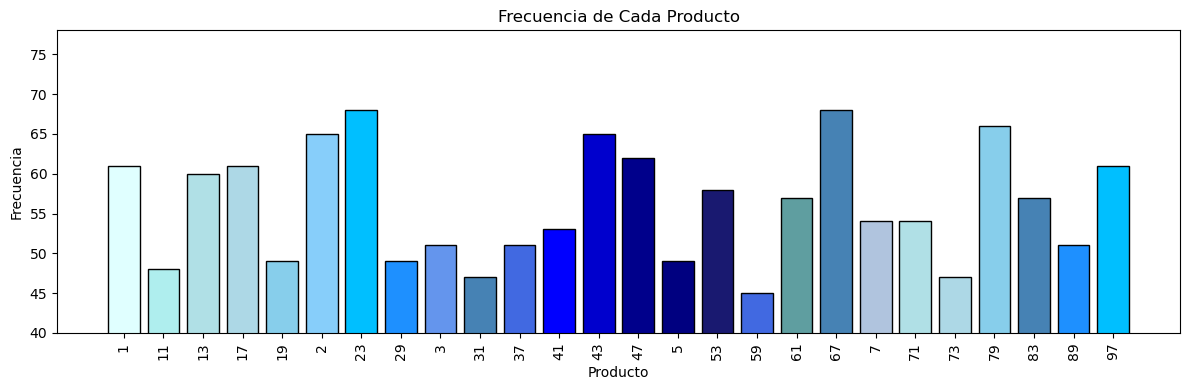

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Selección de datos
productos = 'SELECT * from tiquets;'
df = pd.read_sql(productos, operaciones) 
df = df['product']
frecuencia_productos = df.value_counts().reset_index()
frecuencia_productos.columns = ['productos', 'frecuencia']
frecuencia_productos_ordenada = frecuencia_productos.sort_values('productos', ascending=True)
valor_minimo = 40  # Establece aquí el valor mínimo que deseas
colores = ["#E0FFFF", "#AFEEEE", "#B0E0E6", "#ADD8E6", "#87CEEB", 
    "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#4682B4", 
    "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080", 
    "#191970", "#4169E1", "#5F9EA0", "#4682B4", "#B0C4DE", 
    "#B0E0E6", "#ADD8E6", "#87CEEB", "#4682B4", "#1E90FF",
    "#00BFFF"]

# Crear el gráfico de barras
plt.figure(figsize = (12,4))
plt.bar(frecuencia_productos_ordenada['productos'], 
        frecuencia_productos_ordenada['frecuencia'], 
        color= colores, edgecolor='black')
plt.ylim(valor_minimo, ((frecuencia_productos_ordenada['frecuencia'].max()) +10))
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Producto')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.savefig('Nivel1_ejercicio3.jpeg')
plt.show()


### Discursión.

##### El gráfico utilizado para representar una variable categórica es un gráfico de barras, donde representamos la frecuencia de cada producto vendido.
##### De la representación, podemos ver que hay productos con más demanda que otros. Tenemos que analizar que tipo de productos son, y de que temática para ofrecer otros similares. De los 100 productos que tenemos se venden 26, y de estos hay unos 5 que son los que más se vende. 
##### Por otro lado, hay que ver el precio de los productos más vendidos, y compararlo con los menos vendidos, para saber si debemos bajar los precios, o por el contrario, se pueden aumentar sus precios.



## Ejercicio 4: Una variable categórica y una numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\976271150.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(companies, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\976271150.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_precio = pd.read_sql(precio, operaciones)


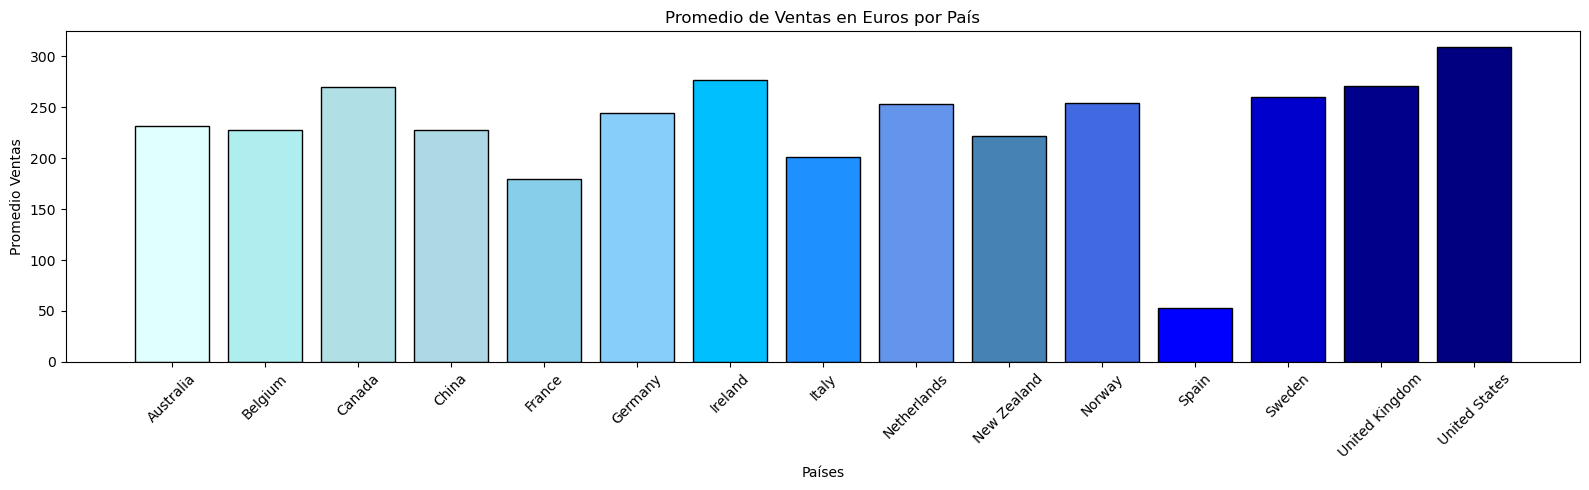

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Selección de datos
precio = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;' 
df_pais = pd.read_sql(companies, operaciones)
df_precio = pd.read_sql(precio, operaciones)

#Renombramos la variable bussiness_id por company_id
df_precio = df_precio.rename(columns={"bussiness_id": "company_id"})

df_datos4 = df_precio.join(df_pais.set_index('company_id'), on = 'company_id')

df_datos4 = df_datos4[['country', 'amount']].dropna()
df_datos_agrupa4 = df_datos4.groupby('country', as_index=False)['amount'].mean().round(2)
#definir una paleta de colores
colores4 = ["#E0FFFF", "#AFEEEE", "#B0E0E6", "#ADD8E6", "#87CEEB", 
            "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#4682B4", 
            "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080"]

# Crear el gráfico de barras
plt.figure(figsize = (16,5))
plt.bar(df_datos_agrupa4['country'], df_datos_agrupa4['amount'],
        color= colores4, edgecolor='black')
plt.xlabel('Países')
plt.ylabel('Promedio Ventas')
plt.title('Promedio de Ventas en Euros por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()


### Discursión.

##### Para representar una variable categórica y otra numérica, hemos utilizado un gráfico de barras. En este caso representamos los paises de las empresas, y el promedio del amount por país.
##### De la representación del promedio del amount por paises, podemos estar tranquilos. Los valores son favorables, a salvo de dos paises donde el resultado no es favorable, España y Francia. Hay que analizar que productos se han comprado, y cuál es el perfil del comprador.


## Ejercicio 5: Dos variables categóricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3062986741.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_declined = pd.read_sql(declined, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3062986741.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(pais, operaciones)


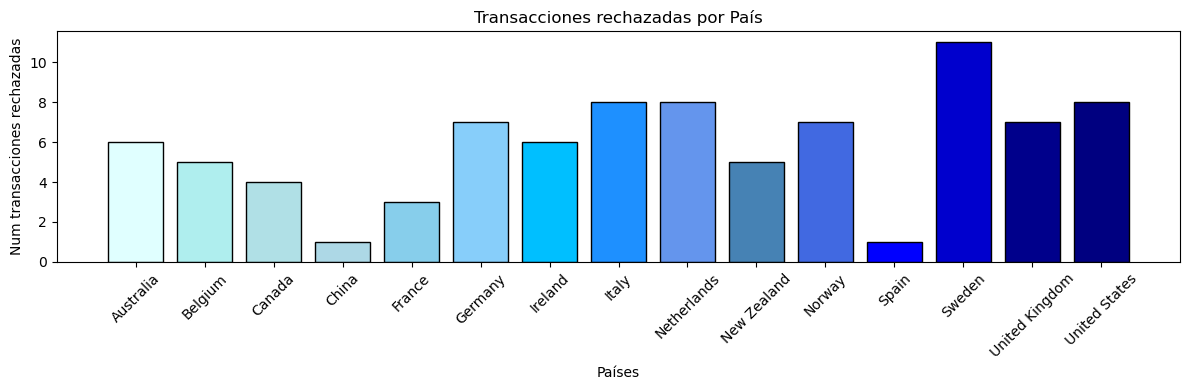

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Selección de datos
declined = 'SELECT * FROM transactions;'
pais = 'SELECT * FROM companies;'
df_declined = pd.read_sql(declined, operaciones)
df_pais = pd.read_sql(pais, operaciones)
df_declined = df_declined.rename(columns={"bussiness_id": "company_id"})
df_pais_declined = pd.merge(df_pais, df_declined, on = 'company_id')
df_pais_declined = df_pais_declined.sort_values('country', ascending=True)
df_pais_declined = df_pais_declined[df_pais_declined['declined'] == 1]
df_final = df_pais_declined[['country', 'declined']].dropna()
df_final_agrupa5 = df_final.groupby('country', as_index=False)['declined'].count()
colores4 = ["#E0FFFF", "#AFEEEE", "#B0E0E6", "#ADD8E6", "#87CEEB", 
            "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#4682B4", 
            "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080"]

plt.figure(figsize = (12,4))
plt.bar(df_final_agrupa5['country'], 
        df_final_agrupa5['declined'], 
        color= colores4, edgecolor='black')
plt.xlabel('Países')
plt.ylabel('Num transacciones rechazadas')
plt.title('Transacciones rechazadas por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.savefig('Nivel1_ejercicio4.jpeg')
plt.show()

### Discursión.

##### El gráfico utilizado para representar dos variables categóricas es el gráfico de barras. Las variables escogidas son country y número de transacciones denegadas. En el eje de las x, representamos los paises de las empresas, y en el eje de las y, representamos el recuento de las transacciones denegadas.
##### Para poder analizar con criterio este gráfico, necesitamos conocer las transacciones totales por país. Y aplicar técnicas de control de fallos en el sistema de pago, y control de fraude.

## Ejercicio 6: Tres variables.

C:\Users\34622\AppData\Local\Temp\ipykernel_9456\1423717755.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9456\1423717755.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)


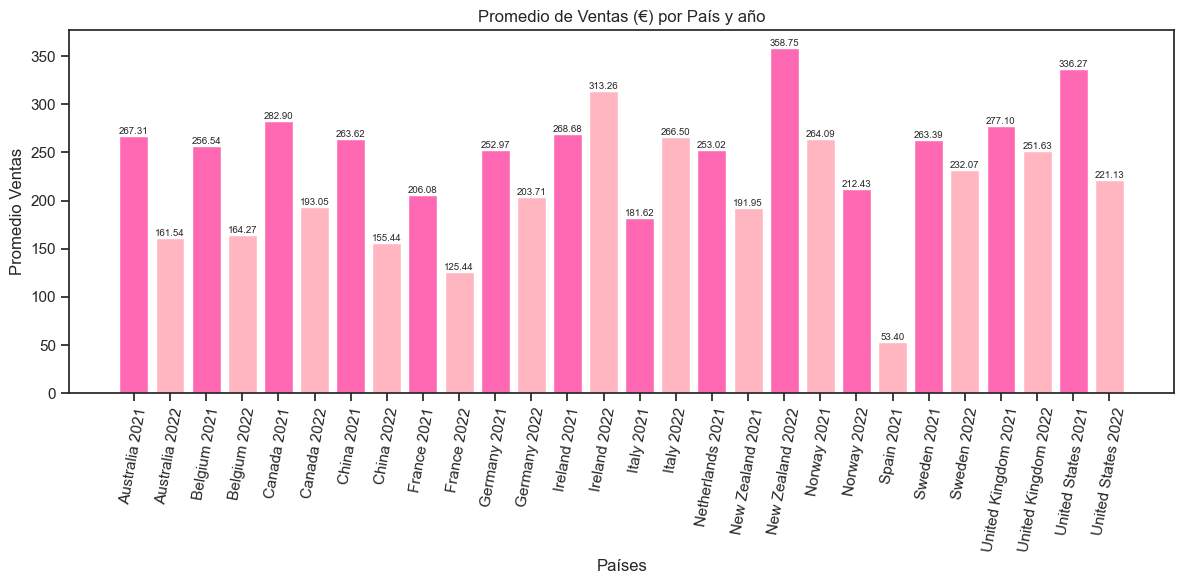

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Selección de datos
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos['year'] = df_datos['dia_hora'].dt.year
colores = ['#FF69B4', '#FFB6C1']

# Agrupar por país y año, y calcular el amount promedio
df_datos_agrupa6 = df_datos.groupby(['country', 'year'])['amount'].mean().reset_index().round(2)


# crear gráfico de barras
plt.figure(figsize = (12,6))
plt.bar(df_datos_agrupa6['country'].astype(str) + ' ' + df_datos_agrupa6['year'].astype(str),
        df_datos_agrupa6['amount'], 
        align='center', color = colores)
plt.xlabel('Países')
plt.ylabel('Promedio Ventas')
plt.title('Promedio de Ventas (€) por País y año')
plt.xticks(rotation=80)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
for index, value in enumerate(df_datos_agrupa6['amount']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=7)
plt.show()

## Discursión.

##### El gráfico utilizado para representar tres variables, hemos escogido un gráfico de barras. Las variables categóricas a representar son country y año. La variable cuantitativa es el promedio del amount.
##### De la representación, podemos observar que para el año 2021, el promedio del amount está por 250 €, con excepción de Francia, Italia, Nueva Zelanda y España. Para el 2022, el promedio del amount va muy bien. De los paises que no alcanzaron el valor objetivo, son sorprendentes los valores de Italia y Nueva Zelanda, que han superado sus ventas significativamente. 
#### Los paises donde no remontamos, son España y Holanda, donde no hay presencia en el año 2022. Hay que estudiar que pasa en estos paises. Y ver si vale la pena seguir con la distribución de nuestros productos en estos paises.
#### Por otro lado, se deben analizar los valores para el segundo trimestre del año, y ver la evolución.

### Ejercicio 7: Graficar un Pairplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3573442762.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3573442762.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3573442762.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)
c:\Users\34622\anaconda3\Lib\sit

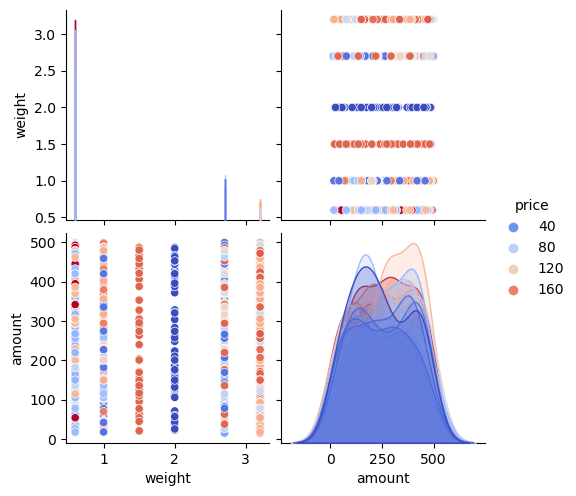

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_data7 = df_final[['weight', 'price', 'amount']]

# crear gráfico
grafica = sns.pairplot(df_data7, hue = 'price', palette = 'coolwarm')
print(grafica)


## Discursión.

##### El pairplot es una función de representación que crea una cuadrícula de gráficos de dispersión e histogramas para todas las combinaciones posibles de variables numéricas de un DataFrame. En este caso, las variables numéricas utilizadas son precio de producto, peso de producto y amount. No parece que tengan una relación que siga un patrón entre las diferentes variables representadas.


# NIVEL 2

### Ejercicio 1: Correlación de todas las variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\24914261.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\24914261.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\24914261.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)


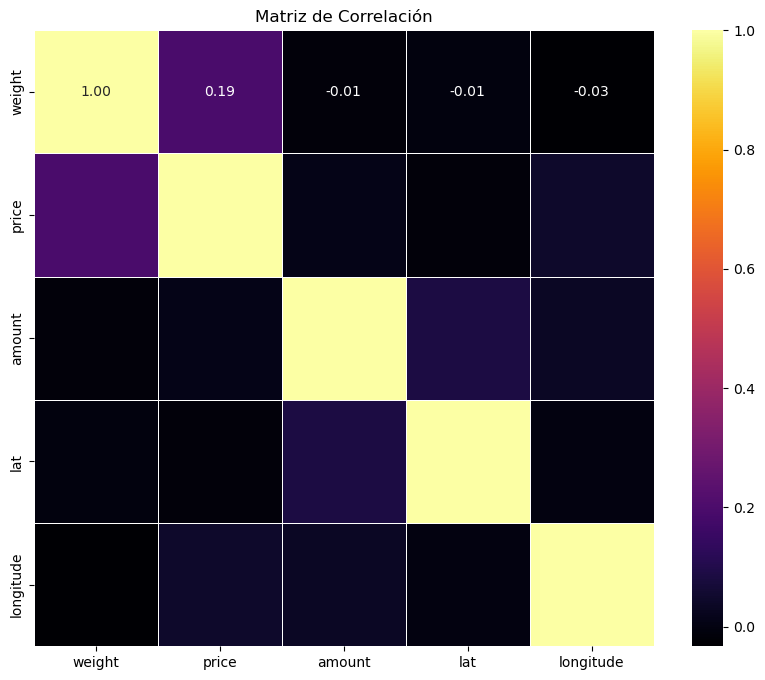

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_data = df_final[['weight', 'price', 'amount', 'lat', 'longitude']]

# Calcular la matriz de correlación de todas las variables numéricas
corr_matrix = df_data.corr(method='pearson')
data21 = pd.DataFrame(corr_matrix)


# crear gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Discursión.

##### En este ejercicio se crea una matriz de correlación siguiendo la distribución de Pearson, donde representamos todas las variables numéricas existentes en nuestro dataframe. En la matriz representada, podemos ver en amarillo la diagonal, donde se representa la correlación de una variable con ella misma, que lógicamente es 1.
##### Para el resto de combinaciones de las variables de dos en dos, podemos ver que está muy cerca del cero. No hay ninguna relación real entre las variables representadas.
##### Por último, se ha representado la latitud y longitud, como variables numéricas, aunque cada una de estas medidas necesita de la otra. No tienen sentido por separado. Ya que las latitud y longitud, son las dos coordenadas que determinan un punto en el espacio.

## Ejercicio 2: Implementa un jointplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\774729162.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
c:\Users\34622\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\34622\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1200 with 0 Axes>

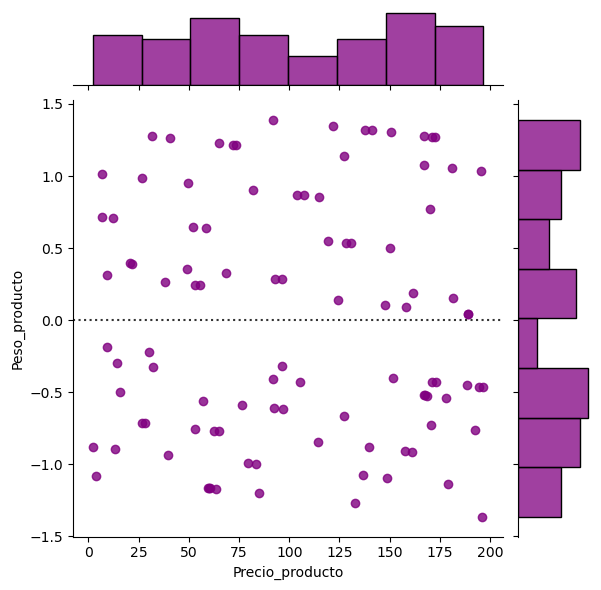

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sa

# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(12, 12))
sns.jointplot(x='price', y='weight', data=df_productos, kind='resid', color = 'purple')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.show()



## Discursión.

##### Un jointplot es una función de visualización de seaborn. Esta función permite crear gráficos que combinan distribuciones marginales y conjuntas de dos variables, proporcionando así una vista completa de las relaciones entre las variables.
#### Las variables numéricas escogidas para representar son Precio y Peso de producto. La distribución de los puntos es aleatoria. NO define nungún patrón. 

# NIVEL 3

### Ejercicio 1: Implementa un violinplot combinado con otro tipo de gráfico.

teoria: Gráficos de violín (violin plots): Muestran la distribución de la variable numérica para cada categoría, incluyendo la densidad de la distribución.




C:\Users\34622\AppData\Local\Temp\ipykernel_15000\1834896180.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)


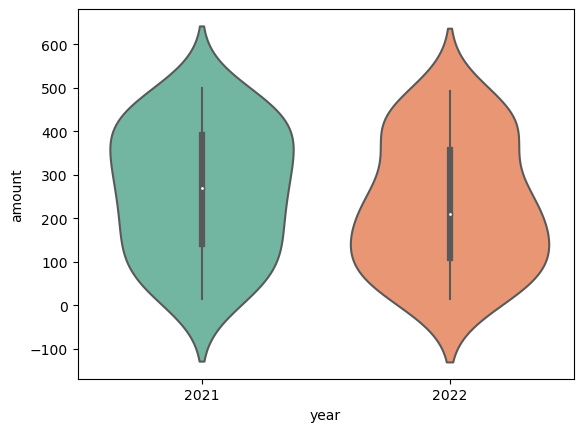

In [11]:
#info: https://python-charts.com/es/distribucion/grafico-violin-matplotlib/

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de datos
transactions = 'SELECT * FROM transactions;'
df_transactions = pd.read_sql(transactions, operaciones)
df_transactions['year']= df_transactions['dia_hora'].dt.year

# Crear un violin plot
violin = sns.violinplot(x='year', y='amount', data=df_transactions, bw=0.5, palette="Set2")
plt.show()

#### Discursión.

##### En el gráfico de Violin, se representa la distribución del amount en los diferentes años. Los gráficos tienen una forma invertida. Para el año 2021, predominan los valores de amount más altos. A lo largo del 2022, los valores de amount se concentran en valores bajos. Esto es debido a que para el año 2022, sólo contamos con datos de los tres primeros meses.






### Ejercicio 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultániamente.

C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3418781793.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_15000\3418781793.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)
c:\Users\34622\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\34622\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

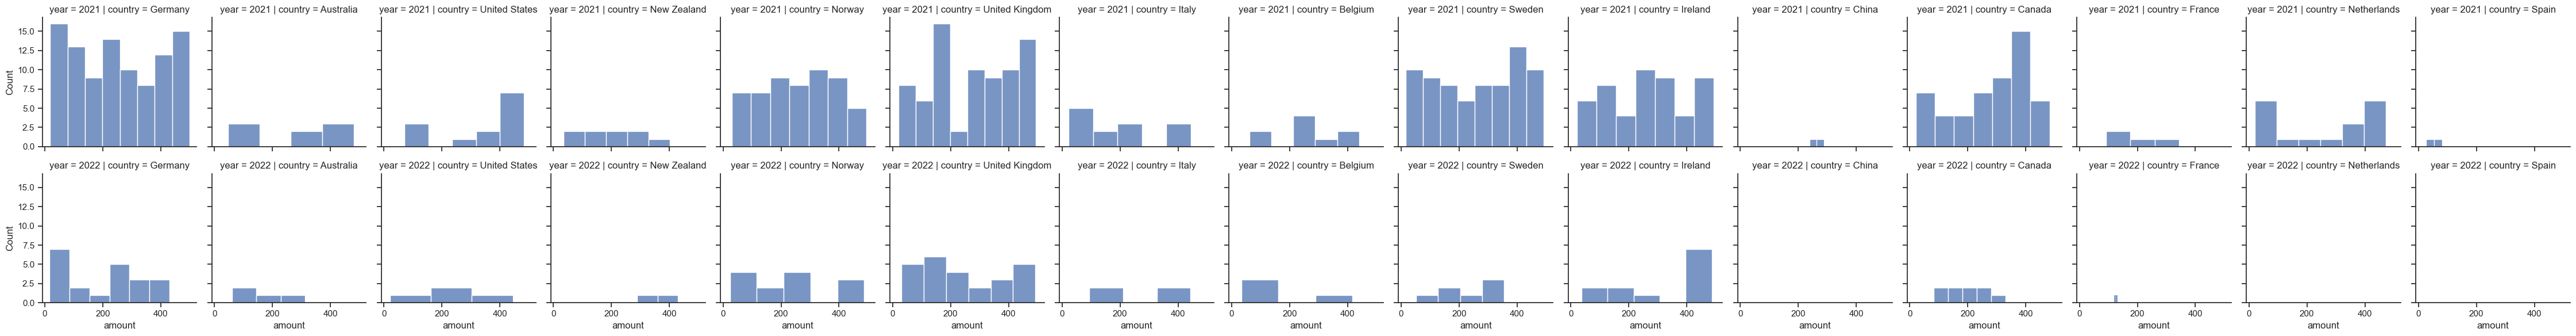

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Selección de datos
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos32 =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos32['year'] = df_datos32['dia_hora'].dt.year.astype(str)
colores = ['#FF69B4', '#FFB6C1']

# creación de un gráfico Facetgrid
sns.set(style="ticks")
g = sns.FacetGrid(df_datos32, row = "year", col="country")
g.map(sns.histplot, "amount")
plt.savefig('Nivel3_ejercicio2.jpeg')
plt.show()

### Discursión.

##### En el gráfico FacetGrid, hemos representado la frecuencia del amount por country y año. Obtenemos una serie de gráficos que nos permite comparar la variación de la frecuencia del amount para cada country en los dos años, y entre los diferentes country.
### Del análisis de los gráficos, podemos ver que hay unos paises que son importantes en el valor de ventas- Estos paises son: Alemania, Noruega, Reino Unido, Suecia, Irlanda y Canada. Se ven muy representados en 2021- En 2022, siguen teniendo peso, Alemania, Noruega y Reino Unido. Las ventas se hacen principlamente en estos paises.
### Una estrategia seria intensificar la publicidad en estos paises, ya que son los más interesados en nuestros productos.